In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c traffic-sign-recognition

403 - Forbidden - Permission 'competitions.participate' was denied


In [4]:
  #Downloading and unzipping the dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip -q /content/gtsrb-german-traffic-sign.zip -d Data

 98% 598M/612M [00:04<00:00, 179MB/s]
100% 612M/612M [00:04<00:00, 142MB/s]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/content/Data')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [6]:
datas = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()
print(cur_path)

/content/Data


## preprocessing the **images**

In [7]:
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))  # Highlighted change: Using os.path.join()
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))  # Highlighted change: Using os.path.join()
            image = image.resize((30, 30))
            image = np.array(image)
            datas.append(image)

            labels.append(i)
        except Exception as e:
            print(e)

# Convert lists into numpy arrays
datas = np.array(datas)  # Highlighted change: Directly converting lists to numpy arrays
labels = np.array(labels)  # Highlighted change: Directly converting lists to numpy arrays

In [ ]:
print(datas)

In [9]:
# for i in range(classes):
#     path = os.path.join(cur_path,'train',str(i))
#     images = os.listdir(path)
#     print(len(images))
#     for a in images:
#         try:
#             image = Image.open(path + '//'+ a)
#             image = image.resize((30,30))
#             image = np.array(image)
#             data.append(image)
#             labels.append(i)
#         except Exception as e:
#             print(e)

# for i in range(classes):
#     path = os.path.join(cur_path, 'train', str(i))
#     images = os.listdir(path)
#     # print(len(images))
#     for a in images:
#         try:
#             image = Image.open(os.path.join(path, a))  # Use os.path.join for path concatenation
#             image = image.resize((30, 30))
#             image = np.array(image)
#             data.append(image)
#             labels.append(i)
#             print(labels)
#         except Exception as e:
#             print(f"Error processing {os.path.join(path, a)}:", e)

# data = np.array(data)
# labels = np.array(labels)


In [10]:
print(len(labels))

39209


In [11]:
# rough
k=0
for i in range(classes):
  ranga = os.path.join(cur_path,'train',str(i))
  imgs = os.listdir(ranga)
  for a in imgs:
    k+=1
print(k)# if this "train":39209
        # if this "Train":39209
        # train + Train = 78418


39209



# # Converting lists into numpy arrays


In [12]:
print(datas.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [13]:
np.save('/content/',datas)
np.save('/content/',labels)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(datas,labels,test_size = 0.2,random_state = 0)

In [15]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(31367, 30, 30, 3) (31367,) (7842, 30, 30, 3) (7842,)


##CONVERT LABELS TO ONE HOT ENCODING

In [16]:
#from keras.utils import to_categorical
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [17]:
from  tensorflow.keras.models import Sequential
model = Sequential()

##model building

In [18]:
model.add(Conv2D(filters = 32,kernel_size = (5,5),activation = 'relu',input_shape = x_train.shape[1:]))
model.add(Conv2D(filters = 32,kernel_size = (5,5),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
#we have 43 classes thats why we define 43 in dense
model.add(Dense(43, activation = 'softmax'))

##compiling the model

In [19]:

model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [20]:
epochs = 20
history=model.fit(x_train , y_train , batch_size = 32 , epochs = epochs, validation_data = (x_test , y_test))

Epoch 1/20
981/981 [==============================] - 114s 115ms/step - loss: 1.9191 - accuracy: 0.5148 - val_loss: 0.5793 - val_accuracy: 0.8690
Epoch 2/20
981/981 [==============================] - 120s 123ms/step - loss: 0.8344 - accuracy: 0.7612 - val_loss: 0.3313 - val_accuracy: 0.9072
Epoch 3/20
981/981 [==============================] - 113s 115ms/step - loss: 0.6417 - accuracy: 0.8099 - val_loss: 0.2290 - val_accuracy: 0.9399
Epoch 4/20
981/981 [==============================] - 112s 114ms/step - loss: 0.5557 - accuracy: 0.8360 - val_loss: 0.2235 - val_accuracy: 0.9314
Epoch 5/20
981/981 [==============================] - 114s 116ms/step - loss: 0.5197 - accuracy: 0.8451 - val_loss: 0.1835 - val_accuracy: 0.9463
Epoch 6/20
981/981 [==============================] - 112s 114ms/step - loss: 0.4608 - accuracy: 0.8613 - val_loss: 0.1680 - val_accuracy: 0.9518
Epoch 7/20
981/981 [==============================] - 113s 115ms/step - loss: 0.4579 - accuracy: 0.8646 - val_loss: 0.1987 -

In [21]:
print(len(datas))

39209


# accuracy

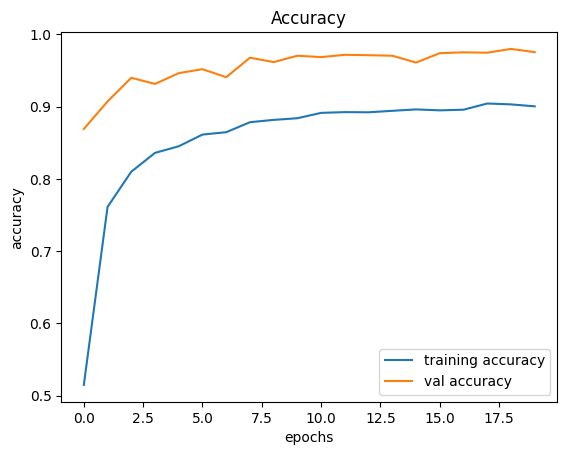

In [22]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

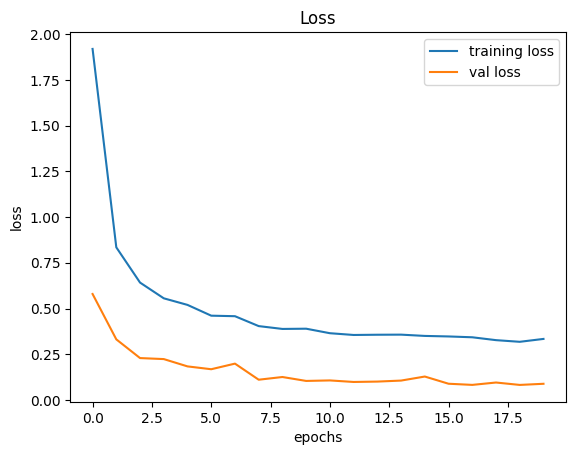

In [23]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

##LEt's do testing on Test data

In [24]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label
X_test, label = testing('/content/Data/Test.csv')
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred

395/395 [==============================] - 10s 26ms/step


array([16,  1, 38, ...,  5,  7, 10])

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9259699129057799


##save the model

In [26]:
# model.save("./content/TSR.h5")

In [27]:
import pickle
pickle.dump(model,open('/content/the_saved_model.sav','wb'))

In [29]:
# Load the Model
# import os
# os.chdir('/content/Data')
# from keras.models import load_model
# loaded_model = load_model('/content/the_saved_model.sav')
loaded_model=pickle.load(open('/content/the_saved_model.sav','rb'))

In [30]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [44]:
from PIL import Image

def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    Y_pred = np.argmax(model.predict(X_test))
    return image,Y_pred



1/1 [==============================] - 0s 94ms/step
Predicted traffic sign is:  Children crossing


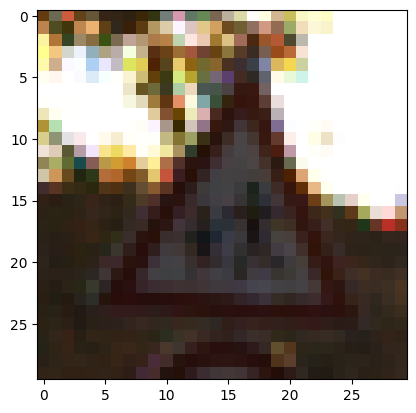

In [52]:
plot,prediction = test_on_img(r'/content/Data/Test/00069.png')

# prediction = str(prediction)
# print(type(prediction))

# s = [str(i) for i in prediction]
# a = int("".join(s))
print("Predicted traffic sign is: ", classes[prediction])
plt.imshow(plot)
plt.show()